<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">KANs for Loan Approval Prediction
 (Classification)
</h1>  
     
</div>

<div style="border-radius:10px; color:black; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>Overview</font></h3>
    
* In this notebook I implement a Kolmogorov-Arnold Network (KAN) for Loan Approval Prediction and compare it against a neural network of a similar architecture.
* this dataset has more data than breast cancer prediction and we want to assess KANs on larger datasets.
* The dataset is from Kaggle, available at this https://www.kaggle.com/competitions/playground-series-s4e10

# Import Packages


In [1]:
import torch
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

device = 'cpu'

## Loading the Dataset

In [2]:
data = pd.read_csv("data/loan_approval.csv")
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
data = data.dropna()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87283 entries, 0 to 91225
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          87283 non-null  int64  
 1   person_age                  87283 non-null  int64  
 2   person_income               87283 non-null  int64  
 3   person_home_ownership       87283 non-null  object 
 4   person_emp_length           87283 non-null  float64
 5   loan_intent                 87283 non-null  object 
 6   loan_grade                  87283 non-null  object 
 7   loan_amnt                   87283 non-null  int64  
 8   loan_int_rate               87283 non-null  float64
 9   loan_percent_income         87283 non-null  float64
 10  cb_person_default_on_file   87283 non-null  object 
 11  cb_person_cred_hist_length  87283 non-null  int64  
 12  loan_status                 87283 non-null  int64  
dtypes: float64(3), int64(6), object(4)
m

<Axes: >

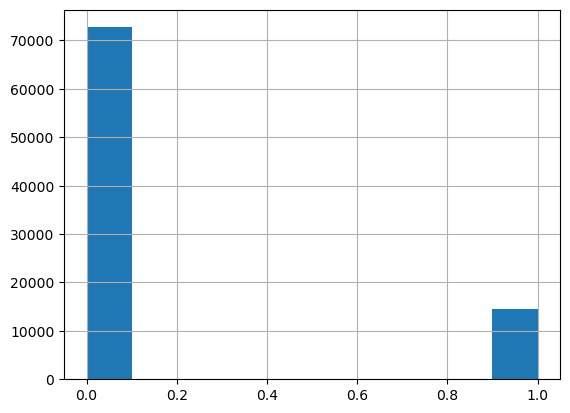

In [5]:
data.loan_status.hist()

In [6]:
# Split dataset into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=1)

## Preprocessing

In [7]:
def Preprocessing(data):
    #Remove id column
    data = pd.get_dummies(data)
    data = data.drop(columns=['id'])

    #StandardScaler
    sacale = StandardScaler()
    target = data['loan_status']
    data = sacale.fit_transform(data.drop(columns=['loan_status']))
    return data, target.tolist()

In [8]:
train_x, train_y = Preprocessing(train_data)
test_x, test_y = Preprocessing(test_data)

In [9]:
test_x

array([[-0.09692019,  0.12203217, -1.13577685, ..., -0.03470453,
         0.42492824, -0.42492824],
       [-0.91721294, -0.0384041 , -0.65714086, ..., -0.03470453,
        -2.35333853,  2.35333853],
       [-0.42503729,  1.4972002 ,  0.06081312, ..., -0.03470453,
        -2.35333853,  2.35333853],
       ...,
       [-0.91721294,  1.03881085,  0.30013111, ..., -0.03470453,
         0.42492824, -0.42492824],
       [ 3.1842508 ,  0.41998524, -0.41782287, ..., -0.03470453,
         0.42492824, -0.42492824],
       [ 1.2155482 , -0.3134377 ,  0.7787671 , ..., -0.03470453,
        -2.35333853,  2.35333853]])

## A summary of various machine learning methods and their accuracy

In [10]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

lcf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
train, test = lcf.fit(train_x, test_x, train_y, test_y)

100%|██████████| 29/29 [01:23<00:00,  6.91s/it]

[LightGBM] [Info] Number of positive: 11650, number of negative: 58176
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 978
[LightGBM] [Info] Number of data points in the train set: 69826, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166843 -> initscore=-1.608167
[LightGBM] [Info] Start training from score -1.608167


100%|██████████| 29/29 [01:23<00:00,  2.88s/it]


In [11]:
train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.94,0.85,0.85,0.94,6.76
LGBMClassifier,0.94,0.85,0.85,0.94,0.34
BaggingClassifier,0.93,0.84,0.84,0.93,2.70
ExtraTreesClassifier,0.94,0.84,0.84,0.93,4.97
SVC,0.93,0.82,0.82,0.93,54.00
DecisionTreeClassifier,0.87,0.82,0.82,0.88,0.43
KNeighborsClassifier,0.92,0.81,0.81,0.92,0.92
AdaBoostClassifier,0.90,0.80,0.80,0.90,1.80
ExtraTreeClassifier,0.88,0.79,0.79,0.88,0.13


In [12]:
test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.94,0.85,0.85,0.94,6.76
LGBMClassifier,0.94,0.85,0.85,0.94,0.34
BaggingClassifier,0.93,0.84,0.84,0.93,2.70
ExtraTreesClassifier,0.94,0.84,0.84,0.93,4.97
SVC,0.93,0.82,0.82,0.93,54.00
DecisionTreeClassifier,0.87,0.82,0.82,0.88,0.43
KNeighborsClassifier,0.92,0.81,0.81,0.92,0.92
AdaBoostClassifier,0.90,0.80,0.80,0.90,1.80
ExtraTreeClassifier,0.88,0.79,0.79,0.88,0.13


## Prepare data for KAN

In [13]:

dataset = {}
dataset['train_input'] = torch.tensor(train_x, dtype=torch.float32, device=device)
dataset['test_input'] = torch.tensor(test_x, dtype=torch.float32, device=device)
dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)
dataset['test_label'] = torch.tensor(test_y, dtype=torch.long, device=device)

In [14]:
dataset['train_input']

tensor([[ 5.4432e+00, -1.0270e-01,  1.5742e+00,  ..., -3.1904e-02,
         -2.2958e+00,  2.2958e+00],
        [-4.2604e-01, -7.2435e-01, -1.1857e+00,  ..., -3.1904e-02,
         -2.2958e+00,  2.2958e+00],
        [-9.1515e-01, -1.0270e-01,  3.1972e-01,  ..., -3.1904e-02,
         -2.2958e+00,  2.2958e+00],
        ...,
        [-2.6301e-01, -4.1353e-01, -6.8390e-01,  ..., -3.1904e-02,
          4.3557e-01, -4.3557e-01],
        [ 3.8913e-01,  9.0203e-04, -6.8390e-01,  ..., -3.1904e-02,
          4.3557e-01, -4.3557e-01],
        [ 2.2609e-01, -3.0992e-01, -1.8209e-01,  ..., -3.1904e-02,
          4.3557e-01, -4.3557e-01]])

In [15]:
print("Train data shape: {}".format(dataset['train_input'].shape))
print("Train target shape: {}".format(dataset['train_label'].shape))
print("Test data shape: {}".format(dataset['test_input'].shape))
print("Test target shape: {}".format(dataset['test_label'].shape))
print("====================================")

Train data shape: torch.Size([69826, 26])
Train target shape: torch.Size([69826])
Test data shape: torch.Size([17457, 26])
Test target shape: torch.Size([17457])


## Creating and Training the KAN [26, 2]

In [16]:
model = KAN(width=[26, 2], grid=5, k=3, seed=0, device=device)

checkpoint directory created: ./model
saving model version 0.0


In [17]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [18]:
%%time
N = 250
results = model.fit(dataset, 
                    opt="Adam",
                    metrics=(train_acc, test_acc),
                    loss_fn=torch.nn.CrossEntropyLoss(),
                    steps=N)

| train_loss: 6.81e-01 | test_loss: 9.29e-01 | reg: 8.42e+01 | : 100%|█| 250/250 [02:17<00:00,  1.82

saving model version 0.1
CPU times: total: 1min 4s
Wall time: 2min 17s


Text(0, 0.5, 'Loss')

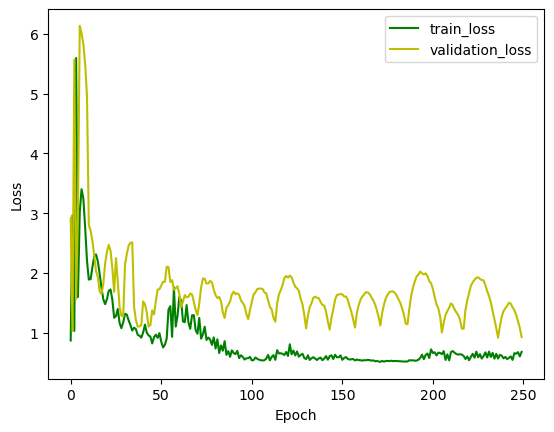

In [19]:
plt.plot(range(N),results['train_loss'], 'g', label='train_loss') 
plt.plot(range(N),results['test_loss'], 'y', label='validation_loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [20]:
print('Training Accuracy :', results['train_acc'][-1])
print('Test Accuracy :', results['test_acc'][-1])

Training Accuracy : 0.9009394645690918
Test Accuracy : 0.8970040678977966


In [21]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print('Total trainable parameters :', params)

Total trainable parameters : 728


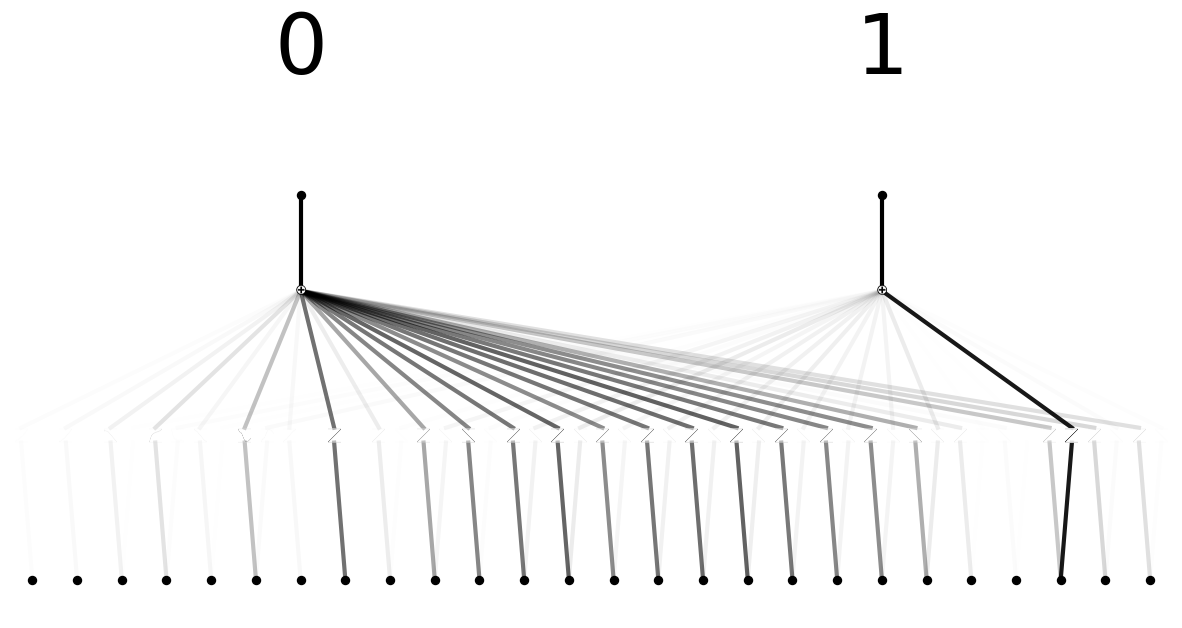

In [22]:
model.plot(scale=1.5, out_vars=[0,1])

## Creating and Training the KAN [26, 10, 2]

In [23]:
model = KAN(width=[26, 10, 2], grid=5, k=3, seed=1, device=device)

checkpoint directory created: ./model
saving model version 0.0


In [24]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [25]:
%%time
N = 100
results = model.fit(dataset, 
                    opt="Adam",
                    metrics=(train_acc, test_acc),
                    loss_fn=torch.nn.CrossEntropyLoss(),
                    steps=N)

| train_loss: 9.12e-01 | test_loss: 5.87e+01 | reg: 4.91e+03 | : 100%|█| 100/100 [01:55<00:00,  1.15

saving model version 0.1
CPU times: total: 1min 33s
Wall time: 1min 55s


Text(0, 0.5, 'Loss')

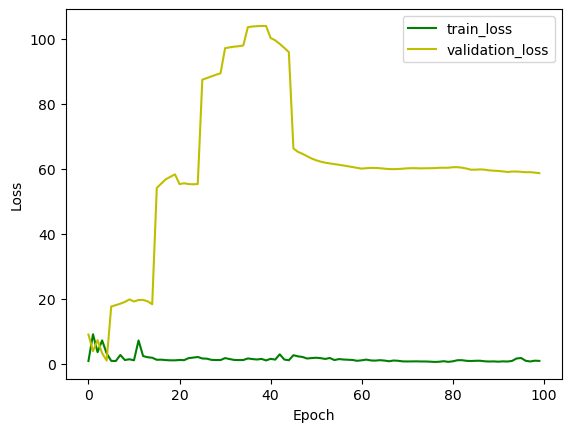

In [26]:
plt.plot(range(N),results['train_loss'], 'g', label='train_loss') 
plt.plot(range(N),results['test_loss'], 'y', label='validation_loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [27]:
print('Training Accuracy :', results['train_acc'][-1])
print('Test Accuracy :', results['test_acc'][-1])

Training Accuracy : 0.8902557492256165
Test Accuracy : 0.812281608581543


In [28]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print('Total trainable parameters :', params)

Total trainable parameters : 3920


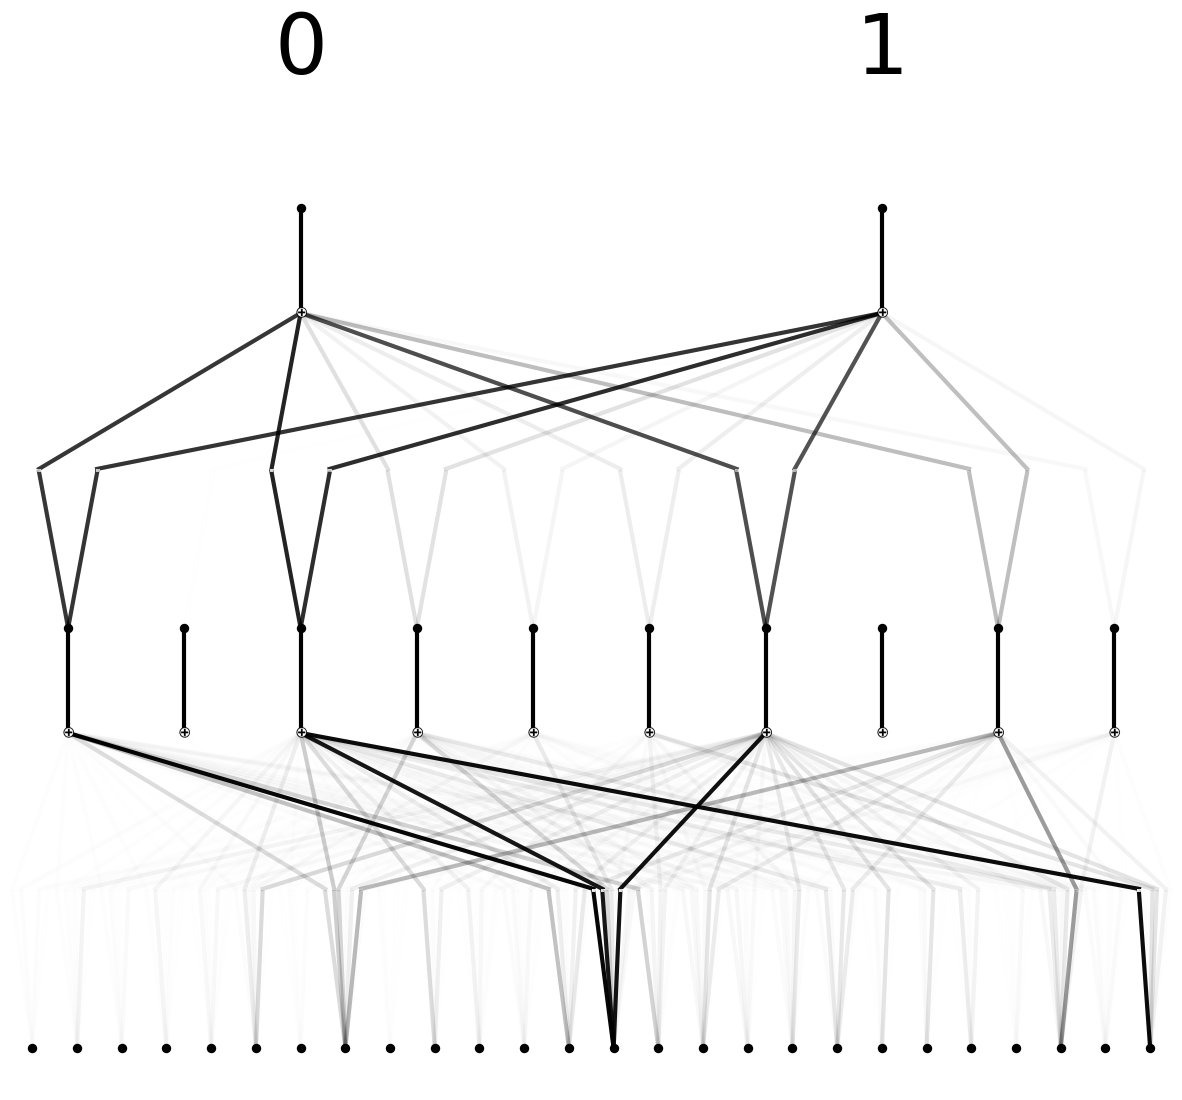

In [29]:
model.plot(scale=1.5, out_vars=[0,1])

# Implementation of a Neural Network for comparison

In [30]:
device = 'cpu'
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(26, 26)  # 4 inputs to 5 hidden nodes
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(26, 2)  # 5 hidden nodes to 3 outputs

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100):
    model.train()
    train_loss_list = []
    val_loss_list = []

    for epoch in range(num_epochs):
        # Training phase
        train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)  # Accumulate loss

        train_loss /= len(train_loader.dataset)  # Average training loss
        train_loss_list.append(train_loss)

        # Validation phase
        model.eval()  # Set model to evaluation mode
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)  # Accumulate loss

        val_loss /= len(val_loader.dataset)  # Average validation loss
        val_loss_list.append(val_loss)
        model.train()  # Set model back to training mode

        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    return train_loss_list, val_loss_list

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy}%')

In [31]:
def load_dataset():
    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['train_input'], dataset['train_label']), batch_size=1000, shuffle=False)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['test_input'], dataset['test_label']), batch_size=1000, shuffle=False)

    return train_loader, test_loader

train_loader, test_loader = load_dataset()

## Train and Evaluate the NN

In [32]:
%%time

model = NeuralNetwork().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

train_loss_list, val_loss_list = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=100)

Epoch 1/100, Training Loss: 0.4765, Validation Loss: 0.3636
Epoch 2/100, Training Loss: 0.3155, Validation Loss: 0.2851
Epoch 3/100, Training Loss: 0.2715, Validation Loss: 0.2652
Epoch 4/100, Training Loss: 0.2568, Validation Loss: 0.2565
Epoch 5/100, Training Loss: 0.2490, Validation Loss: 0.2510
Epoch 6/100, Training Loss: 0.2434, Validation Loss: 0.2464
Epoch 7/100, Training Loss: 0.2385, Validation Loss: 0.2422
Epoch 8/100, Training Loss: 0.2342, Validation Loss: 0.2385
Epoch 9/100, Training Loss: 0.2305, Validation Loss: 0.2355
Epoch 10/100, Training Loss: 0.2277, Validation Loss: 0.2331
Epoch 11/100, Training Loss: 0.2256, Validation Loss: 0.2312
Epoch 12/100, Training Loss: 0.2238, Validation Loss: 0.2296
Epoch 13/100, Training Loss: 0.2224, Validation Loss: 0.2283
Epoch 14/100, Training Loss: 0.2212, Validation Loss: 0.2273
Epoch 15/100, Training Loss: 0.2202, Validation Loss: 0.2265
Epoch 16/100, Training Loss: 0.2194, Validation Loss: 0.2259
Epoch 17/100, Training Loss: 0.21

Text(0, 0.5, 'Loss')

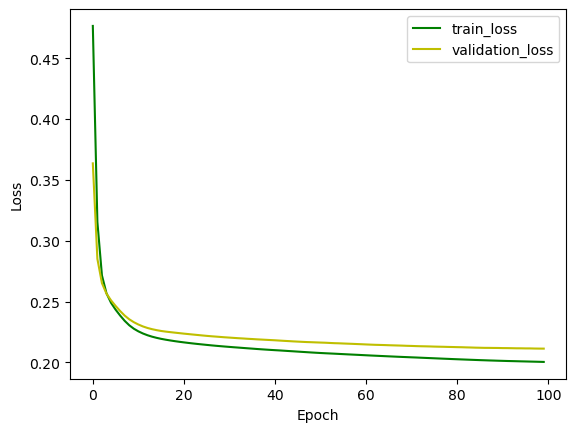

In [33]:
plt.plot(train_loss_list, 'g', label='train_loss') 
plt.plot(val_loss_list, 'y', label='validation_loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [34]:
test_model(model, test_loader)

Accuracy: 93.49831013347081%


In [35]:
test_model(model, train_loader)

Accuracy: 93.72583278434966%


In [36]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
params

756

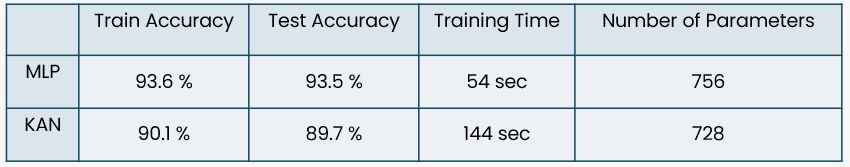

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: green; font-size:100%; text-align:left">

<h3 align="center"><font color='white'>💡 Summary from above :</font></h3>

1. MLPs can achieve higher accuracy when working with real datasets 
2. biggest bottleneck of KANs lies in its slow training
3. KANs are usually 10x slower than MLPs, given the same number of parameters.